In [1]:
pwd

'/Users/aidasaglinskas/Desktop/BC-MRI-AE/Colab Notebooks'

In [2]:
!which umap

In [3]:
from helper_funcs import *
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt

In [4]:
import umap.umap_ as umap
reducer = umap.UMAP()

In [5]:
embedding = pickle.load(open('../Data/embedded_data_noreducer.pickle','rb'))

In [6]:
list(embedding.keys())

['embedding_bg',
 'embedding_sl',
 'embedding_vae',
 'sfari_embedding_vae',
 'sfari_embedding_bg',
 'sfari_embedding_sl',
 'bg_space_abide',
 'sl_space_abide',
 'vae_space_abide',
 'bg_space_sfari',
 'sl_space_sfari',
 'vae_space_sfari',
 'bg_Sspace_sfari',
 'sl_Sspace_sfari',
 'vae_Sspace_sfari']

In [7]:
df = pd.read_csv('../Data/ABIDE_legend_S982.csv')
df = df[df['DxGroup'].values==1]
df.shape

(470, 90)

In [8]:
df.reset_index(inplace=True)

In [9]:
sl_space = embedding['sl_space_abide']
bg_space = embedding['bg_space_abide']
vae_space = embedding['vae_space_abide']

470


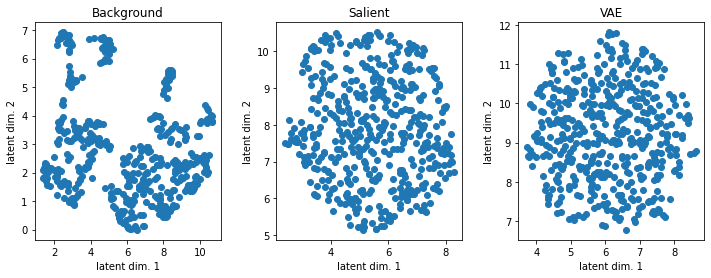

In [10]:
cscatter([bg_space,sl_space,vae_space])

In [11]:
import seaborn as sns

In [166]:
map_ = get_umap_corners(sl_space)
df_new = pd.DataFrame()

for c in ['L','R','T','B','center']:
    df2 = df.copy()
    #df2 = df2[['AgeAtScan', 'FIQ','ADOS_Total', 'ADI_R_RRB', 'ADI_R_VerbalTotal', 'ADI_R_SocialTotal']]
    #df2 = df2[['ScanSiteID']]
    nsubs = 50
    df2 = df2.iloc[map_[c][0:nsubs]]
    df2['subID'] = np.arange(nsubs)
    df2['C'] = c
    df_new = df_new.append(df2)
    
df_new.sample(5)
print(df_new.shape)
#df_new = df_new.dropna()

(250, 93)


In [156]:
from sklearn.metrics import mutual_info_score

In [163]:
v1 = dfc['ax1'].values
v2 = dfc['val'].values


mutual_info_score(v1,v2)

/Users/aidasaglinskas/opt/anaconda3/envs/py4/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


0.36094777750511364

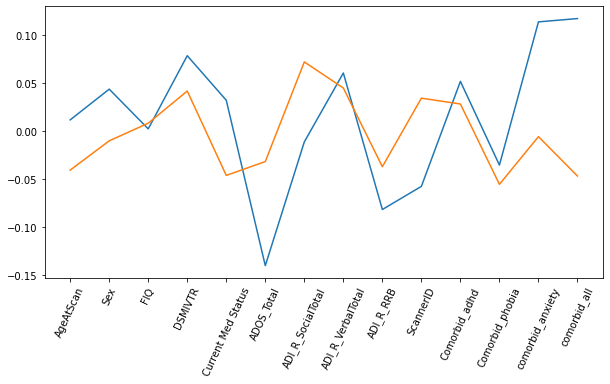

In [161]:
keys = ['AgeAtScan', 'Sex', 'FIQ','DSMIVTR','Current Med Status', 'ADOS_Total', 'ADI_R_SocialTotal',
 'ADI_R_VerbalTotal','ADI_R_RRB','ScannerID', 'Comorbid_adhd',
 'Comorbid_phobia', 'comorbid_anxiety', 'comorbid_all']

l1 = list()
l2 = list()
for key in keys:
    dfc = pd.DataFrame()
    dfc['ax1'] = sl_space[:,0]
    dfc['ax2'] = sl_space[:,1]
    dfc['val'] = df[key]
    dfc = dfc.dropna()
    c1 = np.corrcoef(dfc['ax1'].values,dfc['val'].values)[0,1]
    c2 = np.corrcoef(dfc['ax2'].values,dfc['val'].values)[0,1]
    
#     c1 = mutual_info_score(dfc['ax1'].values,dfc['val'].values)
#     c2 = mutual_info_score(dfc['ax2'].values,dfc['val'].values)
    l1.append(c1)
    l2.append(c2)
    
plt.figure(figsize=(10,5))
plt.plot(l1);
plt.plot(l2);
plt.xticks(np.arange(len(keys)),labels=keys,rotation=65);

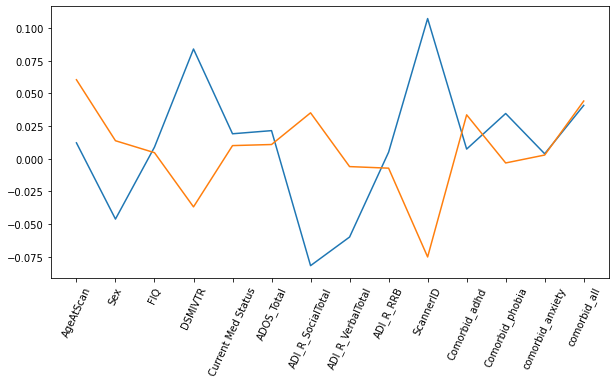

In [155]:
keys = ['AgeAtScan', 'Sex', 'FIQ','DSMIVTR','Current Med Status', 'ADOS_Total', 'ADI_R_SocialTotal',
 'ADI_R_VerbalTotal','ADI_R_RRB','ScannerID', 'Comorbid_adhd',
 'Comorbid_phobia', 'comorbid_anxiety', 'comorbid_all']

l1 = list()
l2 = list()
for key in keys:
    dfc = pd.DataFrame()
    dfc['ax1'] = vae_space[:,0]
    dfc['ax2'] = vae_space[:,1]
    dfc['val'] = df[key]
    dfc = dfc.dropna()
    c1 = np.corrcoef(dfc['ax1'].values,dfc['val'].values)[0,1]
    c2 = np.corrcoef(dfc['ax2'].values,dfc['val'].values)[0,1]
    l1.append(c1)
    l2.append(c2)
    
plt.figure(figsize=(10,5))
plt.plot(l1);
plt.plot(l2);
plt.xticks(np.arange(len(keys)),labels=keys,rotation=65);

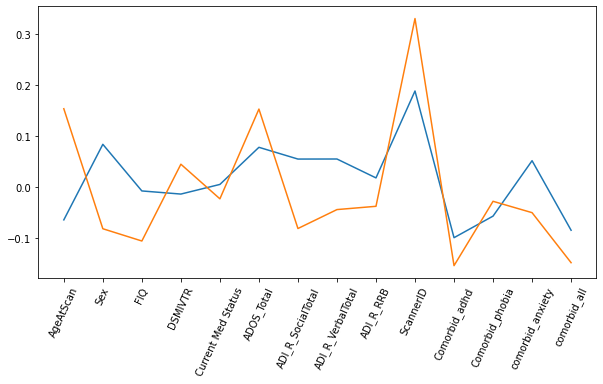

In [154]:
keys = ['AgeAtScan', 'Sex', 'FIQ','DSMIVTR','Current Med Status', 'ADOS_Total', 'ADI_R_SocialTotal',
 'ADI_R_VerbalTotal','ADI_R_RRB','ScannerID', 'Comorbid_adhd',
 'Comorbid_phobia', 'comorbid_anxiety', 'comorbid_all']

l1 = list()
l2 = list()
for key in keys:
    dfc = pd.DataFrame()
    dfc['ax1'] = bg_space[:,0]
    dfc['ax2'] = bg_space[:,1]
    dfc['val'] = df[key]
    dfc = dfc.dropna()
    c1 = np.corrcoef(dfc['ax1'].values,dfc['val'].values)[0,1]
    c2 = np.corrcoef(dfc['ax2'].values,dfc['val'].values)[0,1]
    l1.append(c1)
    l2.append(c2)
    
plt.figure(figsize=(10,5))
plt.plot(l1);
plt.plot(l2);
plt.xticks(np.arange(len(keys)),labels=keys,rotation=65);

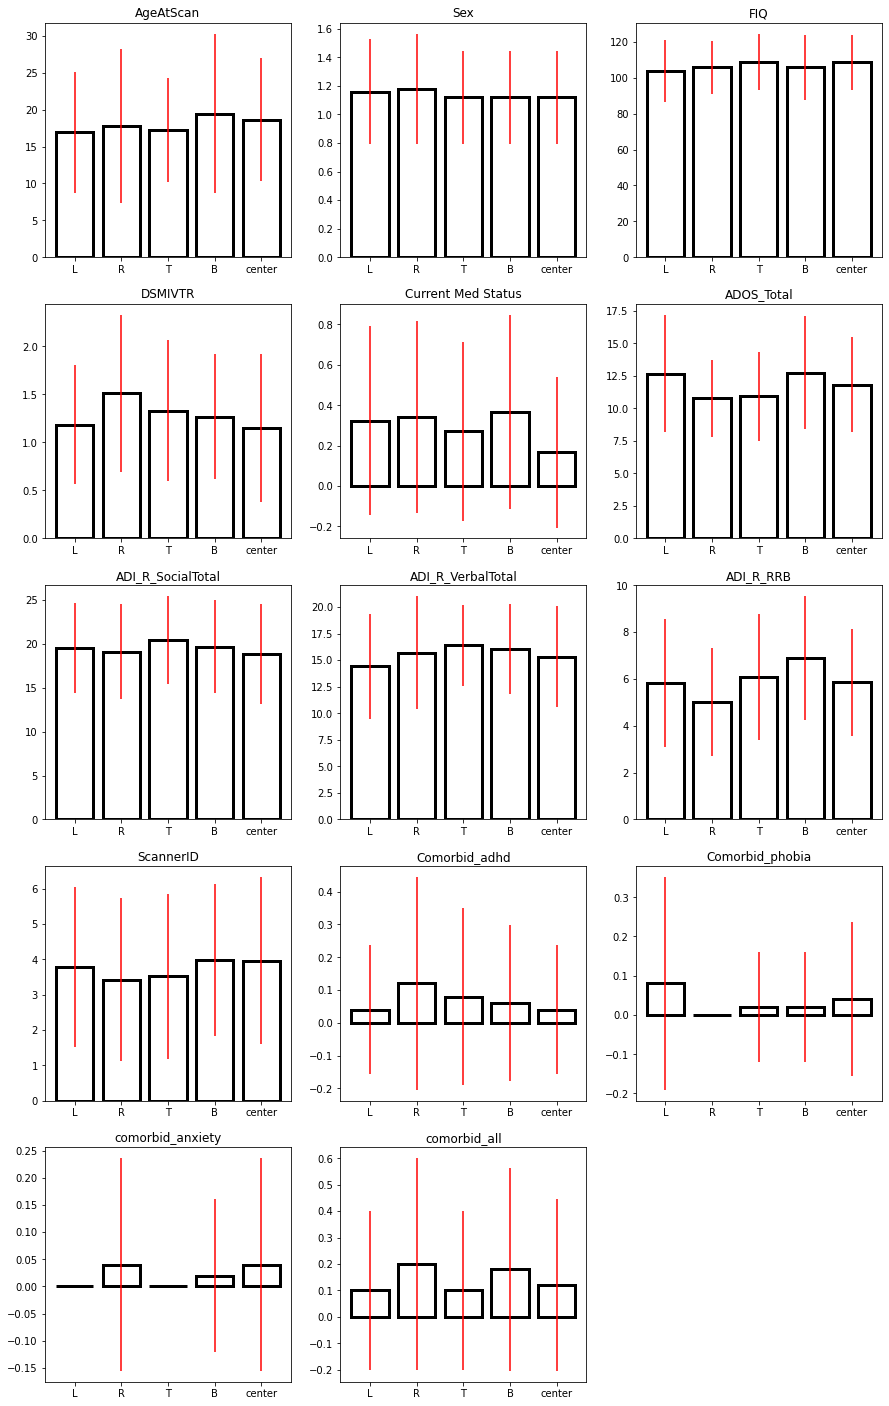

In [167]:
keys = ['AgeAtScan', 'Sex', 'FIQ','DSMIVTR','Current Med Status', 'ADOS_Total', 'ADI_R_SocialTotal',
 'ADI_R_VerbalTotal','ADI_R_RRB','ScannerID', 'Comorbid_adhd',
 'Comorbid_phobia', 'comorbid_anxiety', 'comorbid_all']

i = 0

plt.figure(figsize=np.array((3,5))*5)
for key in keys:
    i +=1
    plt.subplot(5,3,i)
    
    #xlbls = ['L','R','T','B','center']
    xlbls = df_new['C'].unique()
    arr = np.array([df_new[df_new['C']==c][key].values for c in xlbls])

    xs = np.arange(len(xlbls))
    #m = arr.mean(axis=1)
    # se = arr.std(axis=1);

    m = np.nanmean(arr,axis=1)
    #m = np.nanmedian(arr,axis=1)
    se = np.nanstd(arr,axis=1)
    
#     n = arr.shape[1]
#     for i in range(arr.shape[0]):
#         plt.scatter(np.repeat(i,n)+(np.random.rand(n)-.5)*.25,arr[i,:],color=[0,0,0,.5])

    plt.bar(xs,m,facecolor=[0,0,0,0],edgecolor=[0,0,0,1],linewidth=3);
    plt.errorbar(xs,m,se,fmt='r ');
    plt.xticks(xs,labels=xlbls);
    plt.title(key)

In [73]:
list(df.columns)

['level_0',
 'Unnamed: 0',
 'index',
 'BIDS_ID',
 'Anonymized ID',
 'Subject Type',
 'Visit',
 'Days since enrollment',
 'SubID',
 'DxGroup',
 'DSMIVTR',
 'AgeAtScan',
 'Sex',
 'FIQ',
 'VIQ',
 'PIQ',
 'IQTest',
 'VIQTest',
 'PIQTest',
 'ADOS_Module',
 'ADOS_Total',
 'ADOS_ResearchReliability',
 'ADI_R_SocialTotal',
 'ADI_R_VerbalTotal',
 'ADI_R_RRB',
 'ADI_R_Onset Total',
 'ADI_R_ResearchReliability',
 'Handedness_Category',
 'Handedness_Scores',
 'ADOS_Comm',
 'ADOS_Social',
 'ADOS_StBeh',
 'Comorbid_adhd',
 'Comorbid_phobia',
 'comorbid_anxiety',
 'comorbid_all',
 'comorbid_other',
 'Comorbidity',
 'SRS_RawTotal',
 'SRS_Version',
 'SCQ_Total',
 'VINELAND_Receptive_Vscore',
 'VINELAND_Expressive_Vscore',
 'VINELAND_Written_Vscore',
 'VINELAND_CommunicationStandard',
 'VINELAND_Personal_Vscore',
 'VINELAND_Domestic_Vscore',
 'VINELAND_Community_Vscore',
 'VINELAND_DaylyLiving_Standard',
 'VINELAND_Interpersonal_Vscore',
 'VINELAND_Play_Vscore',
 'VINELAND_Coping_Vscore',
 'VINELAND_Soc